## Principal Component Analysis

### Subtask 1: PCA on the Iris dataset

In [276]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [277]:
iris = load_iris()

X, y = iris.data, iris.target

In [278]:
print(X.shape)
print(iris.feature_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


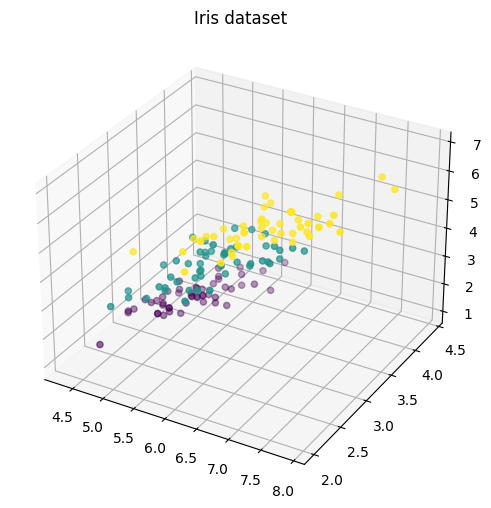

In [279]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_title('Iris dataset')

plt.show()

/home/vornic/sigmoid/06_PCA/PCA.py:46: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  self.matrix_w = np.hstack((self.eig_pairs[i][1].reshape(


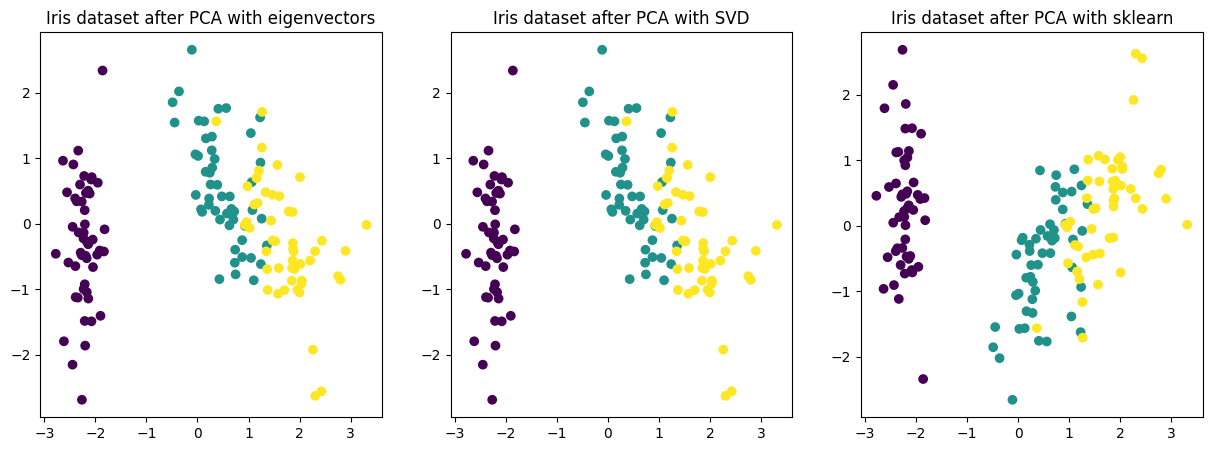

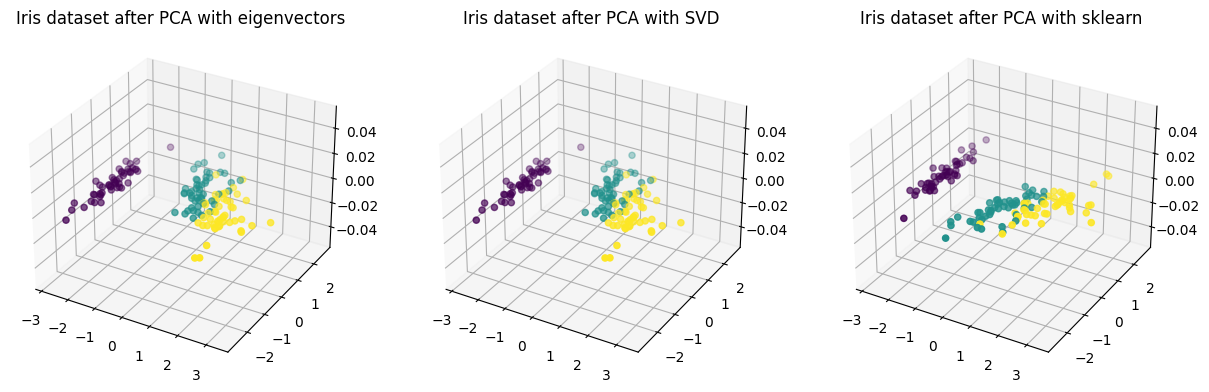

In [280]:
from PCA import myPCA

pca_eigen = myPCA(method='eigen')
pca_svd = myPCA(method='svd')
pca = PCA(n_components=2)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_eigen.fit(X_scaled)
pca_svd.fit(X_scaled)
pca.fit(X_scaled)

X_pca_eigen = pca_eigen.transform(X_scaled)
X_pca_svd = pca_svd.transform(X_scaled)
X_pca = pca.fit_transform(X_scaled)

def plot_pca(projection = None):
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(131, projection=projection)
    ax2 = fig.add_subplot(132, projection=projection)
    ax3 = fig.add_subplot(133, projection=projection)

    ax1.scatter(X_pca_eigen[:, 0], X_pca_eigen[:, 1], c=y)
    ax1.set_title('Iris dataset after PCA with eigenvectors')

    ax2.scatter(X_pca_svd[:, 0], X_pca_svd[:, 1], c=y)
    ax2.set_title('Iris dataset after PCA with SVD')

    ax3.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
    ax3.set_title('Iris dataset after PCA with sklearn')

    plt.show()

plot_pca()
plot_pca('3d')

The scatter plots generated using the algorithms from SMHL are looking the same, while the one from sklearn seems to be flipped along the x-axis. This is because the sklearn implementation uses the opposite sign convention for the eigenvectors, as can be seen in the source code [here](https://github.com/scikit-learn/scikit-learn/blob/4c65d8e/sklearn/decomposition/pca.py#L391), to enforce deterministic output.

With respect to the scatter plot of the initial dataset (not reduced to 2 dimensions), the data became more linearly separable using PCA. This is because the PCA algorithm is able to find the directions of maximum variance in the data, which are the directions in which the data is most spread out.

[0.92461872]


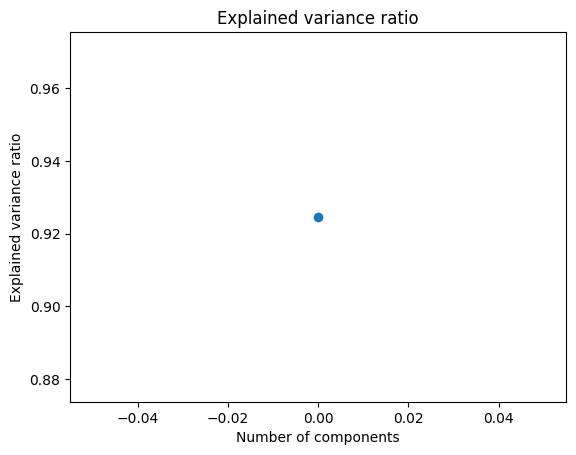

In [281]:
pca_1 = PCA(n_components=1)
pca_1.fit(X)

print(pca_1.explained_variance_ratio_)

plt.plot(pca_1.explained_variance_ratio_, 'o-')
plt.title('Explained variance ratio')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

Since __n_components__ was set to 1, __explained_variance_ratio__ will contain only one value, which is the variance of the first principal component. The variance of the first principal component is 0.92461872, which means that it explains around 92.46% of the variability in the original data. This is a relatively high value and suggests that the first principal component is a good summary of the original data.

### Subtask 2

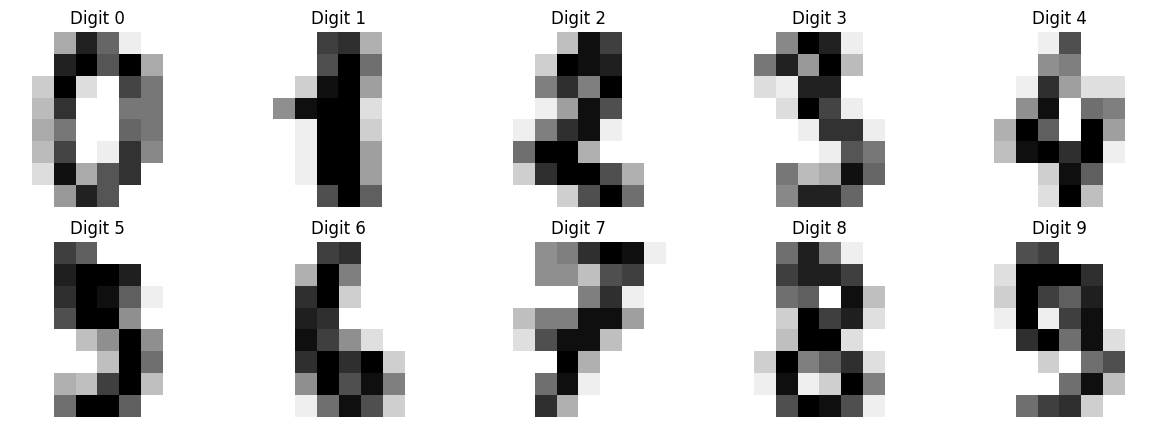

In [282]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.set_title(f"Digit {i}")
    ax.axis("off")

plt.show()

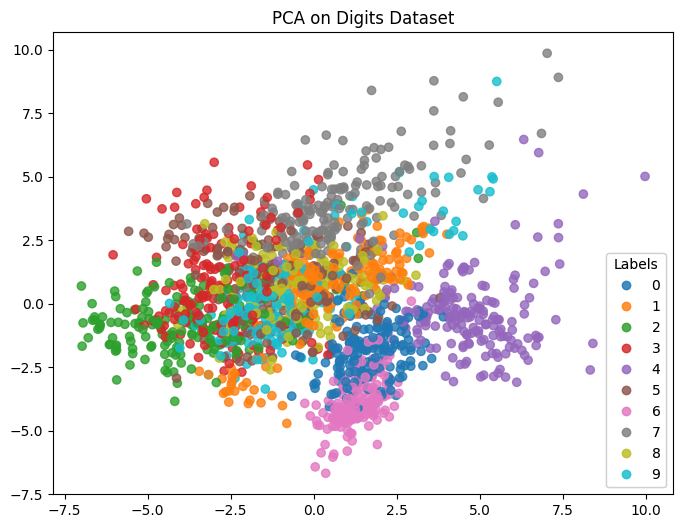

In [283]:
pca = PCA(n_components=2)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)

pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, cmap='tab10', alpha=0.8)
legend = plt.legend(*scatter.legend_elements(), title='Labels')
plt.gca().add_artist(legend)
plt.title('PCA on Digits Dataset')

plt.show()